# Investigate the Quality of Flower102

In [ ]:
#!pip install torch==2.0.0 torchvision scienceplots einops torchinfo randomname seaborn -q

In [10]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# TODO: replace with package after public on PyPi
import sys

sys.path.append("../")

from src.cleaner.selfclean import PretrainingType, SelfClean

In [8]:
dataset_splits = []
for split in ["train", "val", "test"]:
    dataset_splits.append(datasets.Flowers102(root="./tmp", download=True, split=split))
dataset = torch.utils.data.ConcatDataset(dataset_splits)

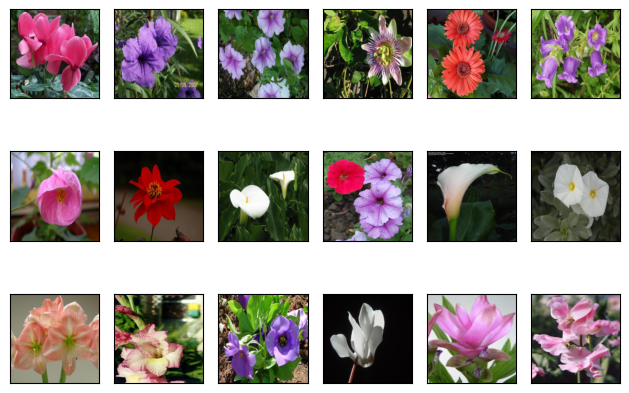

In [18]:
fig, axes = plt.subplots(3, 6)
for h_idx, h_ax in enumerate(axes):
    for v_idx, ax in enumerate(h_ax):
        index = np.random.randint(0, high=len(dataset))
        ax.imshow(transforms.Resize((256, 256))(dataset[index][0]))
        ax.set_xticks([])
        ax.set_yticks([])
        index += 1
fig.tight_layout()
plt.show()

In [19]:
selfclean = SelfClean(
    auto_cleaning=True,
    plot_distribution=True,
    plot_top_N=7,
)
out_dict = selfclean.run_on_dataset(
    dataset=dataset,
    pretraining_type=PretrainingType.DINO,
    num_workers=24,
    epochs=100,
    batch_size=16,
)

Will run the code on one GPU.


[W socket.cpp:426] [c10d] The server socket has failed to bind to [::]:29500 (errno: 98 - Address already in use).
[W socket.cpp:426] [c10d] The server socket has failed to bind to 0.0.0.0:29500 (errno: 98 - Address already in use).
[E socket.cpp:462] [c10d] The server socket has failed to listen on any local network address.


RuntimeError: The server socket has failed to listen on any local network address. The server socket has failed to bind to [::]:29500 (errno: 98 - Address already in use). The server socket has failed to bind to 0.0.0.0:29500 (errno: 98 - Address already in use).

In [ ]:
# TODO: plot dups, irr, lbls individually